# **Setup**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
data70 = 'https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/Naive%20Bayes/train.csv'
data30 = 'https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/Naive%20Bayes/test.csv'

trainData = pd.read_csv(data70)
testData = pd.read_csv(data30)

In [ ]:
trainData.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [ ]:
testData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


# **Analisis Exploratorio**

In [ ]:
print("Train data shape:", trainData.shape)
print("Test data shape:", testData.shape)

Train data shape: (7352, 563)
Test data shape: (2947, 563)


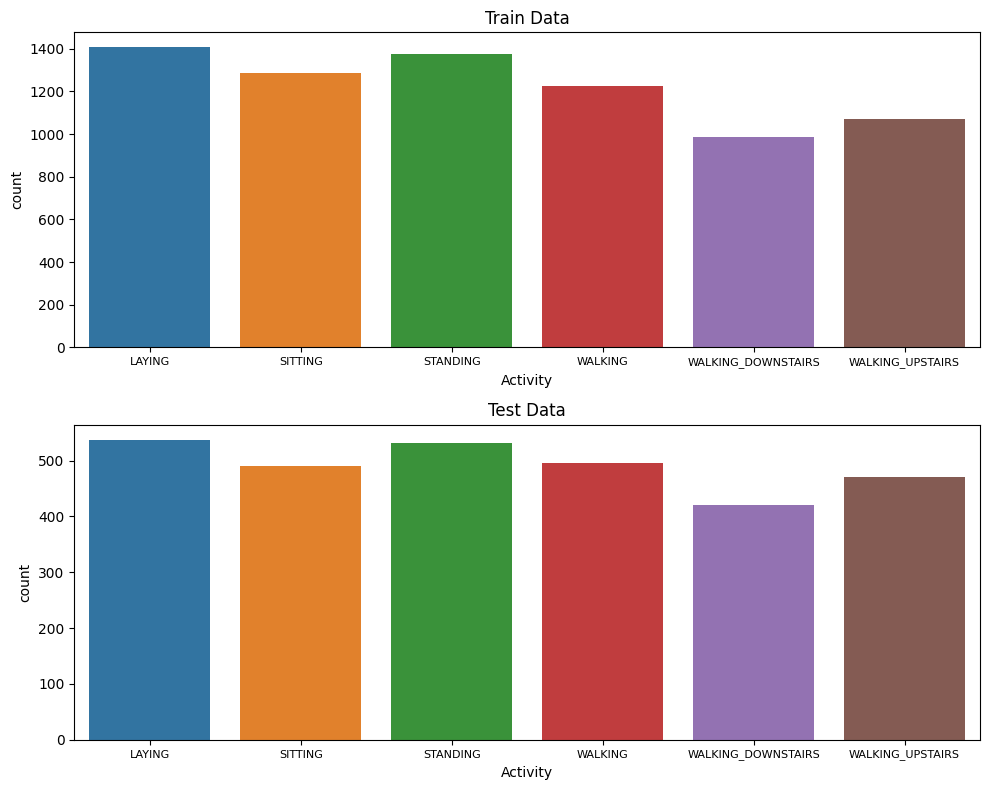

In [ ]:
registrosTrain = pd.crosstab(index=trainData['Activity'], columns='count')
registrosTest = pd.crosstab(index=testData['Activity'], columns='count')

fig, ax = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(data=registrosTrain, x=registrosTrain.index, y=registrosTrain['count'], ax=ax[0])
sns.barplot(data=registrosTest, x=registrosTest.index, y=registrosTest['count'], ax=ax[1])

ax[0].tick_params(axis='x', labelsize = 8)
ax[0].set_title('Train Data')
ax[1].tick_params(axis='x', labelsize = 8)
ax[1].set_title('Test Data')

plt.tight_layout()
plt.show()

Existe un pequeño desbalance en los datos que corresponden a Walking Downstairs y Walking Uptairs, observandose posiblemente mas datos en

# **Definiendo y Estandarizando variables**

In [ ]:
X_train = trainData.drop(['Activity', 'subject'], axis=1)
X_test = testData.drop(['Activity', 'subject'], axis=1)
y_train = trainData['Activity']
y_test = testData['Activity']

In [ ]:
X_train_stand = StandardScaler().fit_transform(X_train)
X_test_stand = StandardScaler().fit_transform(X_test)

In [ ]:
encoder = preprocessing.LabelEncoder().fit(y_train)

y_train_new = encoder.transform(y_train)
y_test_new = encoder.transform(y_test)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_stand)
X_test_scaled = scaler.transform(X_test_stand)

# **Ajustando el Modelo Naive Bayes**

In [ ]:
pipeline =  Pipeline([
    ('MnB', MultinomialNB(fit_prior=False)),
])

parameters = {'MnB__alpha':[0.1, 0.5, 1.0, 2.0]}

nb_grid = GridSearchCV(pipeline,parameters, cv=10)
nb_grid.fit(X_train_scaled, y_train_new)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('MnB',
                                        MultinomialNB(fit_prior=False))]),
             param_grid={'MnB__alpha': [0.1, 0.5, 1.0, 2.0]})

In [ ]:
print('Mejor parámetros:', nb_grid.best_params_)

Mejor parámetros: {'MnB__alpha': 2.0}


In [ ]:
bestAlpha = nb_grid.best_params_['MnB__alpha']
nb = MultinomialNB(alpha=bestAlpha)
nb.fit(X_train_scaled, y_train_new)

MultinomialNB(alpha=2.0)

#**Predicciones y Metricas**

In [ ]:
y_predict = nb.predict(X_test_scaled)

In [ ]:
pd.crosstab(y_test_new, y_predict)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,531,0,0,0,0,6
1,0,395,89,0,0,7
2,0,86,436,0,0,10
3,0,0,0,415,70,11
4,0,0,0,47,312,61
5,0,0,0,10,20,441


In [ ]:
print(classification_report(y_test_new, y_predict));

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.82      0.80      0.81       491
           2       0.83      0.82      0.82       532
           3       0.88      0.84      0.86       496
           4       0.78      0.74      0.76       420
           5       0.82      0.94      0.88       471

    accuracy                           0.86      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.86      0.86      0.86      2947



# **Interpretacion**

En los valores predichos vs los datos de pruebas, el modelo obtuvo algunas equivocaciones en comparacion a los datos reales y que en donde mas podemos observar mas errores de prediccion fue en la variable "2", correspondiente a Standing de la variable Activities.

Sin embargo, el modelo NB obtuvo un valor de 0.86 en precision, lo que nos indica que el modelo funciona bien de todas formas y que es capaz de predicir datos con un 86% de precision con el set de pruebas del conjunto de datos. En conclusion, la capacidad predictiva del modelo para el conjunto de datos es bastante buena.